#**Predicting House Price with Linear Regression**

**Problem Statement and Challenges:**

---> The main objective of this project is to build a predictive model using linear regression to estimate a numerical outcome based on a dataset with relevent features.

**Challenges are :---** Data Collection , Data Exploration and Cleaning , Feature Selection , Model Training , Model Evaluation , Visualization .

In [ ]:
#Importing the libraries
#Importing Pandas library for data manipulation
import pandas as pd

#Importing Numpy library for numerical calculations
import numpy as np

#Importing Matplotlib and Seaborn for Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#For Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/House prediction dataset.csv')
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
#Checking shape
data.shape

(545, 13)

In [ ]:
#Data  Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#Data Cleaning

In [ ]:
#Checking null values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

**There are no null values in this dataset.**

In [ ]:
data.duplicated().sum()

0

**Hence, there are no duplicate values in this dataset.**

#Outlier Analysis and Visualising the Data

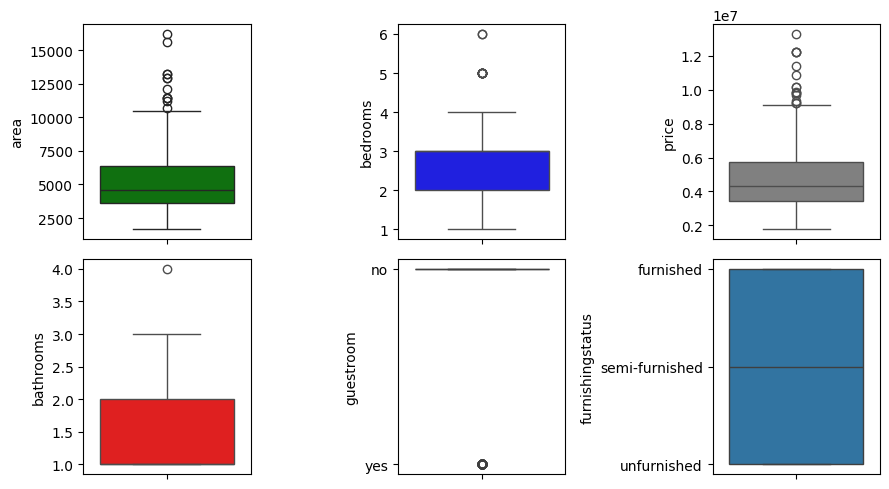

In [ ]:
fig,axis = plt.subplots(2,3,figsize=(9,5))
plt_1= sns.boxplot(data['area'],ax=axis[0,0],color='g')
plt_2=sns.boxplot(data['bedrooms'],ax=axis[0,1],color='b')
plt_3=sns.boxplot(data['price'],ax=axis[0,2],color='grey')
plt_4=sns.boxplot(data['bathrooms'],ax=axis[1,0],color='r')
plt_5=sns.boxplot(data['guestroom'],ax=axis[1,1])
plt_6=sns.boxplot(data['furnishingstatus'],ax=axis[1,2])
plt.tight_layout()

<Axes: ylabel='stories'>

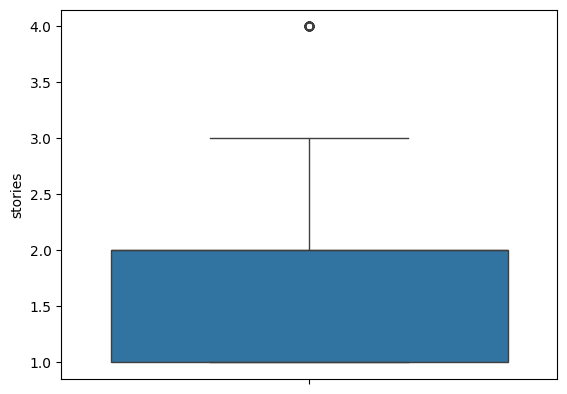

In [ ]:
sns.boxplot(data=data['stories'])

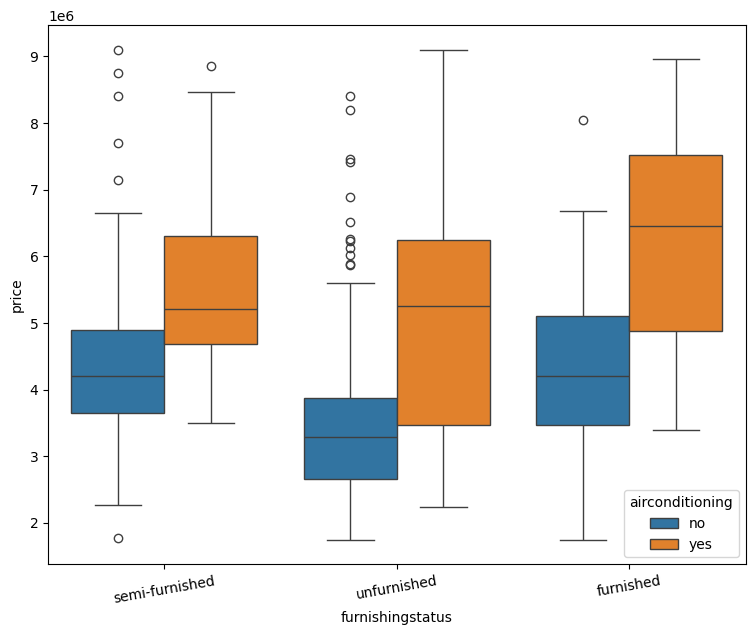

In [ ]:
f,ax=plt.subplots(figsize=(9,7))
fig=sns.boxplot(x='furnishingstatus',y='price',
                hue='airconditioning',data=data)
xt=plt.xticks(rotation=10)

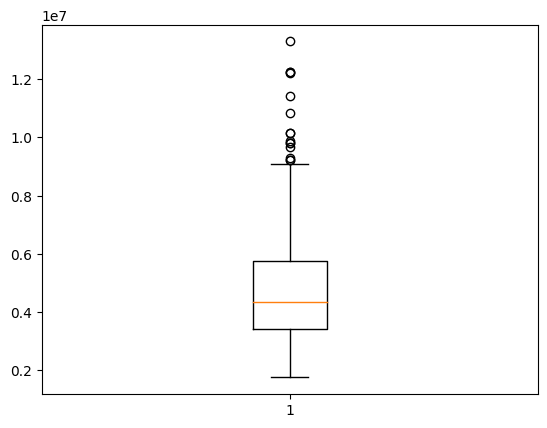

In [ ]:
#Qutlier treatment for price
plt.boxplot(data.price)
Q1=data.price.quantile(0.25)
Q3=data.price.quantile(0.75)
IQR=Q3-Q1
data=data[(data.price >= Q1-1.5*IQR)&(data.price <= Q3+1.5*IQR)]

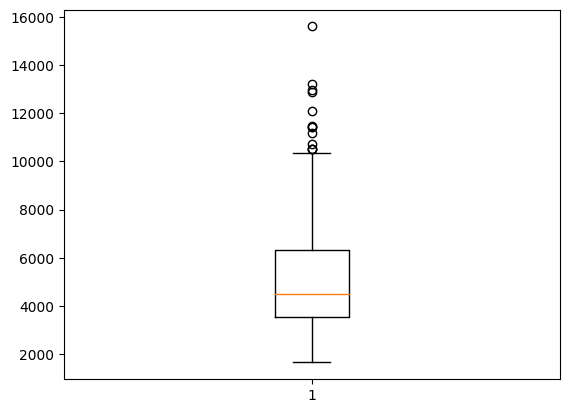

In [ ]:
# Outlier treatment for area
plt.boxplot(data.area)
Q1=data.area.quantile(0.25)
Q3=data.area.quantile(0.75)
IQR=Q3-Q1
data=data[(data.area >= 1-1.5*IQR)&(data.area <= Q3+1.5*IQR)]

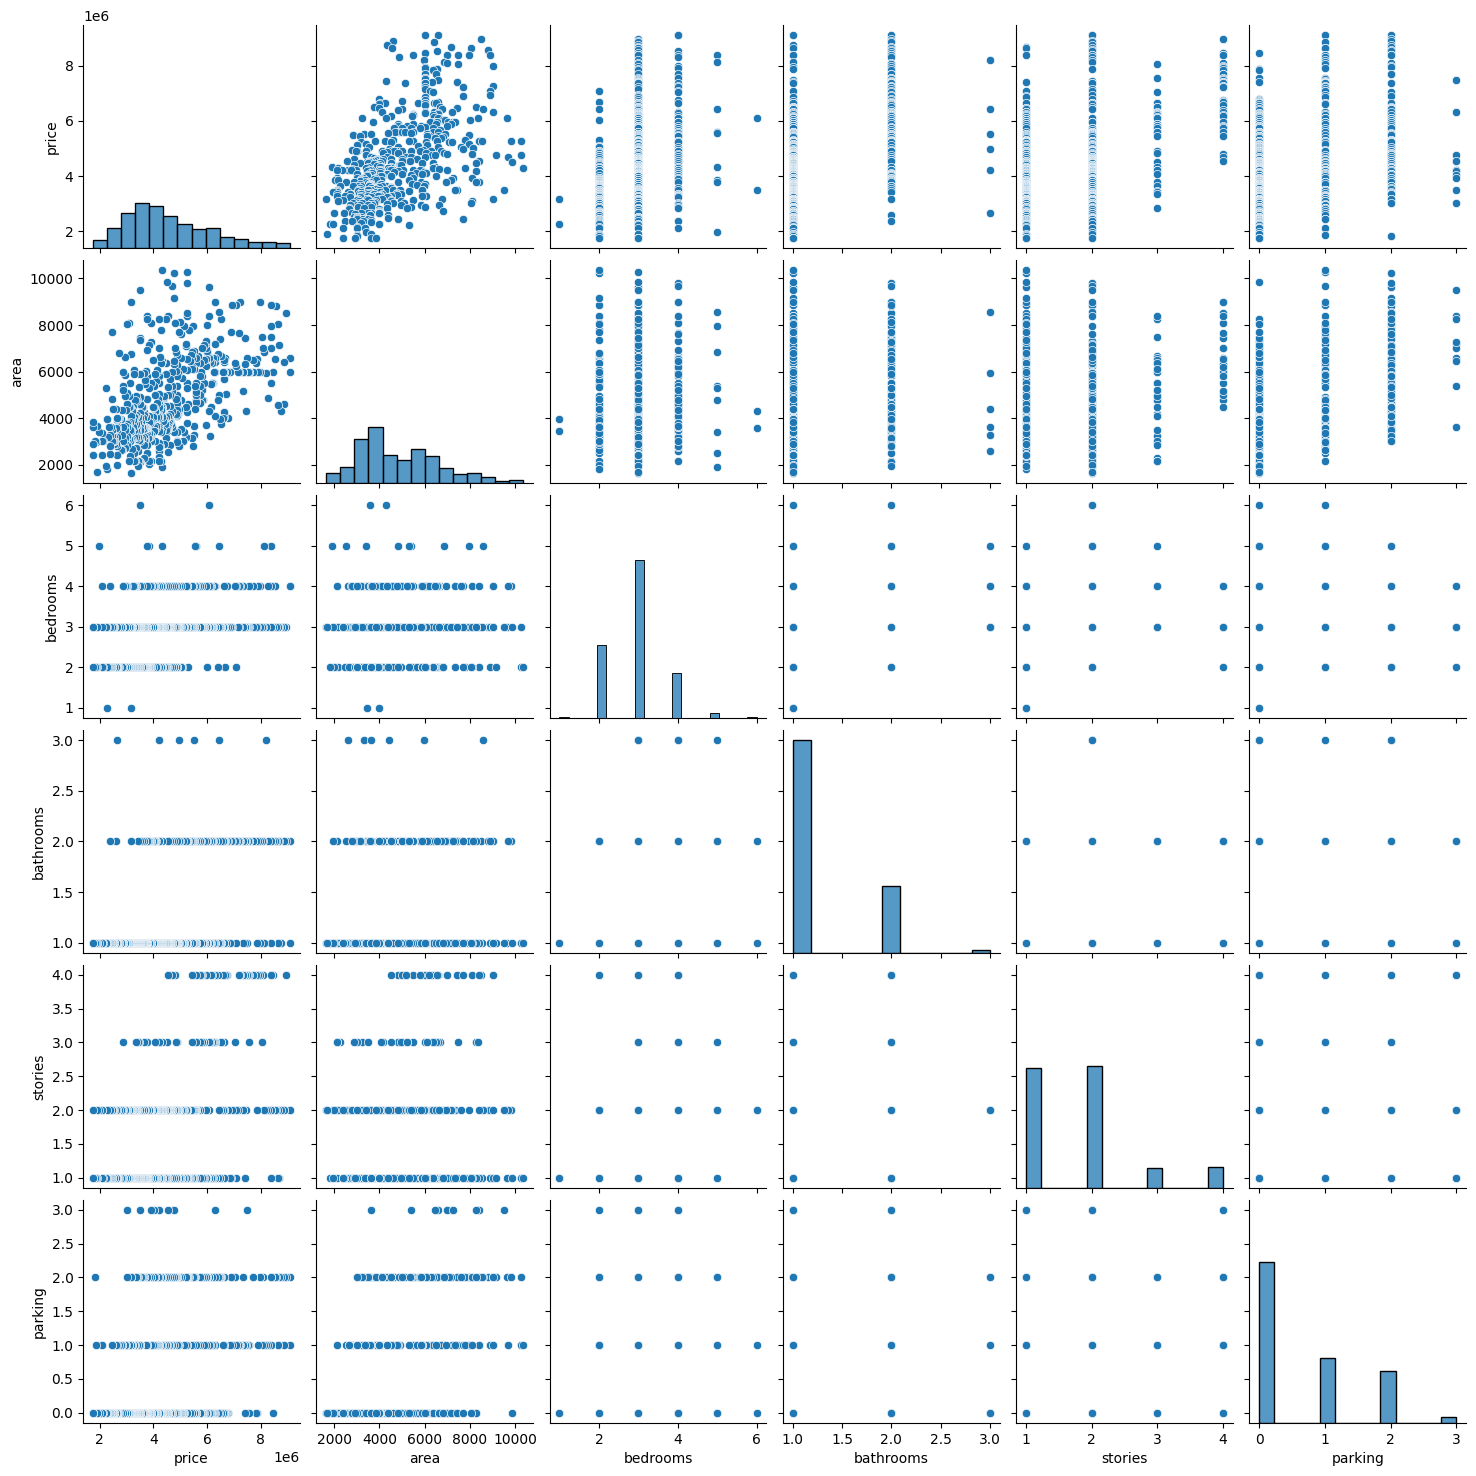

In [ ]:
sns.pairplot(data)
plt.show()

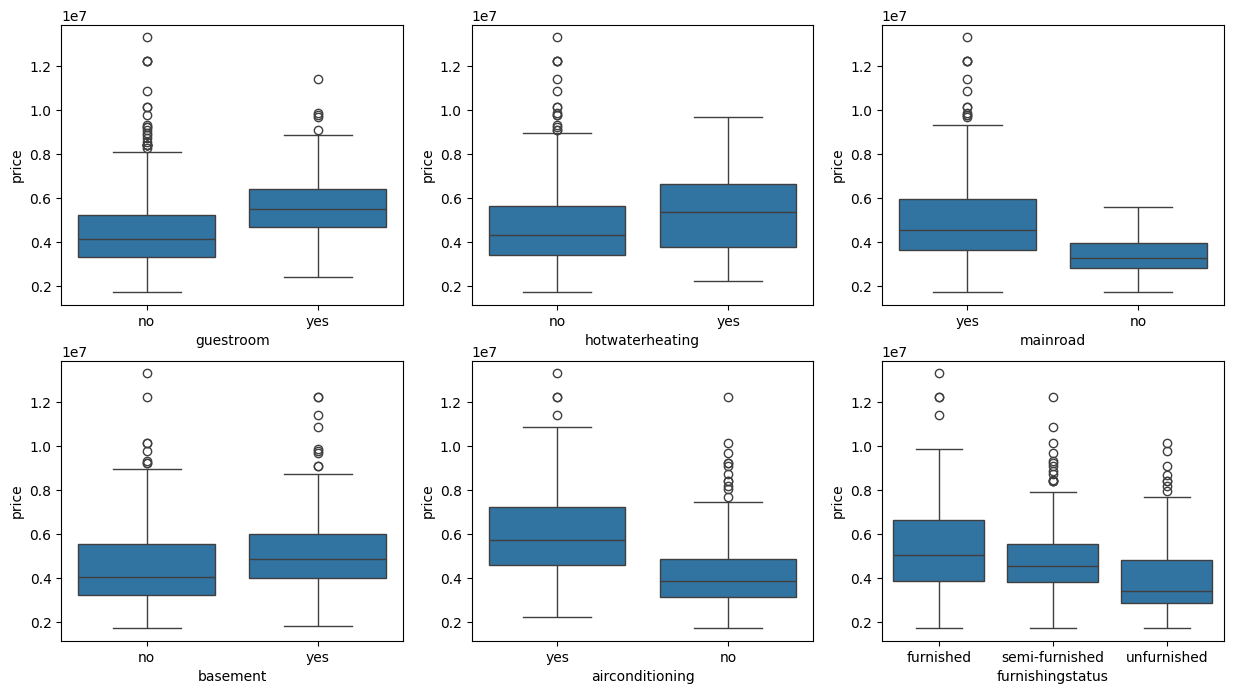

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.boxplot(x='guestroom',y='price',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='hotwaterheating',y='price',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='mainroad',y='price',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='basement',y='price',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=data)
plt.show()

#Data Preparation

**In this dataset , there is some columns which has values like 'Yes' or 'No' . To convert this in numerical values in 1s and 0s, where 1 is 'Yes' and 0 is 'No'for better analysis.**

In [ ]:
L_1 = ['mainroad','guestroom','basement',
       'hotwaterheating','airconditioning','prefarea']

def binary(x):
  return x.map({'yes':1,'no':0})

data[L_1] = data[L_1].apply(binary)

In [ ]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,unfurnished


#Dummy Variables

**The "furnishingstatus" has three levels. We have to convert these levels into integer for better analysis. We will use something that is called dummy variables.**

In [ ]:
status = pd.get_dummies(data['furnishingstatus'])

In [ ]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


**Now we don't need the three columns, we can drop the furnished column. And the type of furnishing can be identified by last two columns---

---> 00 for furnished

---> 01 for unfurnished

---> 10 for semi-furnished



In [ ]:
#Droping the first column from status
status = pd.get_dummies(data['furnishingstatus'],drop_first=True)

In [ ]:
#Adding the results to original data
data=pd.concat([data,status],axis=1)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [ ]:
#Droping 'furnishingstatus' as we already created the dummies for this
data.drop(['furnishingstatus'],axis=1,inplace=True)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#Splitting the Data into Training and Testing Sets

In [ ]:
#The first basic step for regression is train-test split.
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data,train_size=0.6,
                      test_size=0.3,random_state=100)

In [ ]:
#Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
#Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_1 = ['area','bedrooms','bathrooms','stories',
         'parking','price']
df_train[num_1]=scaler.fit_transform(df_train[num_1])

In [ ]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.215385,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.780769,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.407692,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.695708,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.730769,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [ ]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,0.325406,0.283886,0.382875,0.134557,0.262997,0.840979,0.174312,0.357798,0.051988,0.296636,0.237513,0.238532,0.434251,0.311927
std,0.184569,0.180854,0.148449,0.238731,0.293325,0.366257,0.379959,0.480087,0.222343,0.457475,0.282998,0.426839,0.496418,0.463990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.192308,0.154523,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.288462,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.430769,0.396383,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


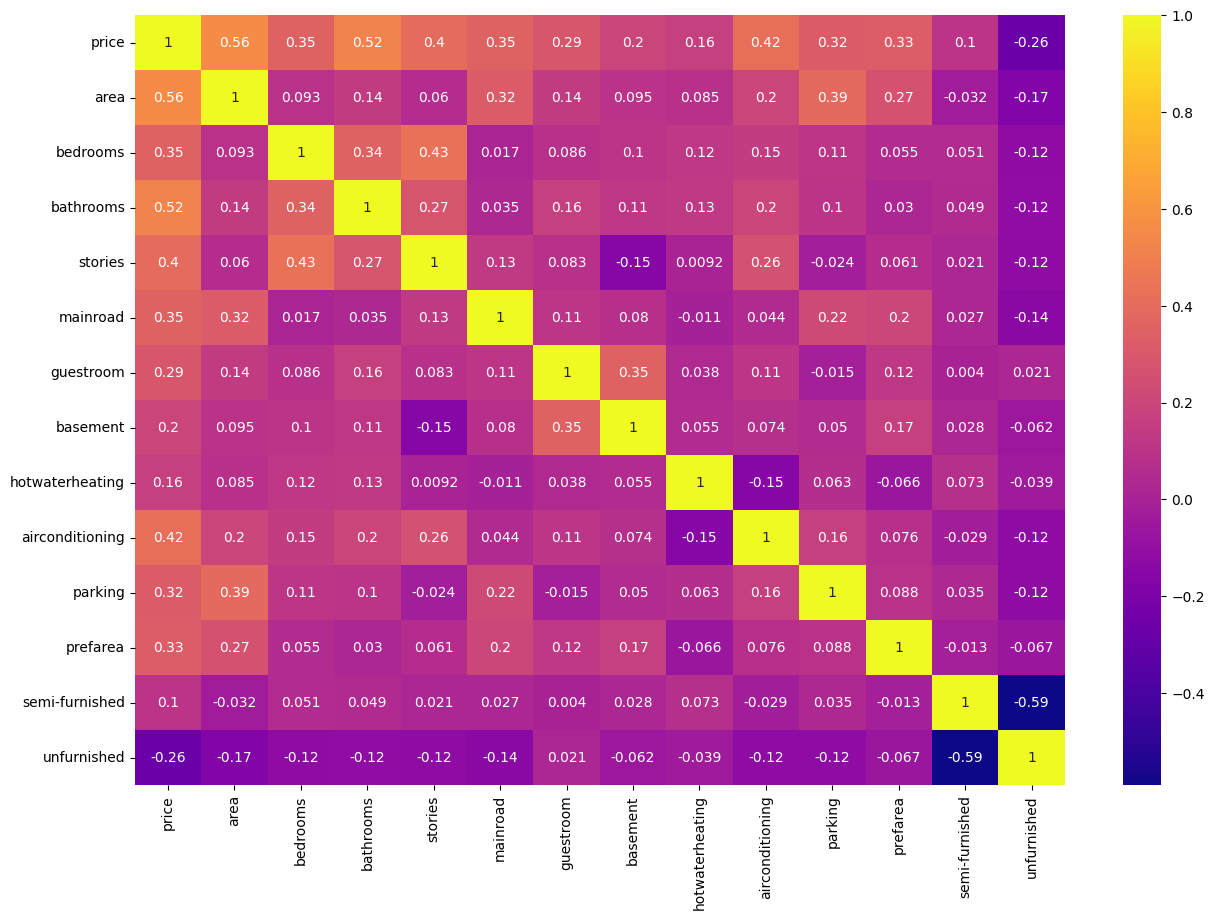

In [ ]:
#Checking correlation coefficient
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True,cmap='plasma')
plt.show()

**By the above heatmap , we can say that the area  seems to the correlated to price is the most.**

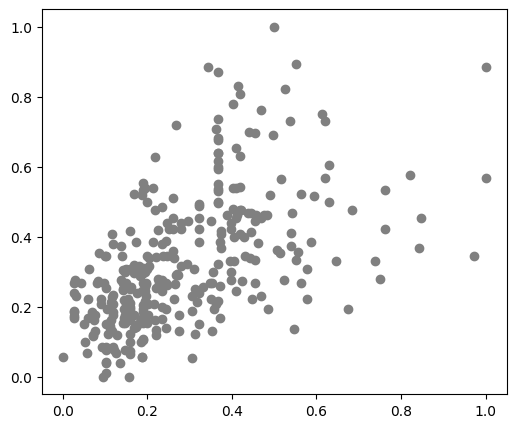

In [ ]:
plt.figure(figsize=[6,5])
plt.scatter(df_train.area,df_train.price,color='grey')
plt.show()

**So, choosing area as the first variable for fitting  a regression line.**

In [ ]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('price')
x_train = df_train

#Making Linear model

In [ ]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [ ]:
#Building a linear model
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)
lr_1=sm.OLS(y_train,x_train_lm).fit()     #OLS stands for Ordinary Least Squares
lr_1.params

const              0.014685
area               0.315628
bedrooms           0.061356
bathrooms          0.231190
stories            0.123498
mainroad           0.066547
guestroom          0.046784
basement           0.022815
hotwaterheating    0.097631
airconditioning    0.084751
parking            0.050825
prefarea           0.066836
semi-furnished     0.020240
unfurnished       -0.016872
dtype: float64

In [ ]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     58.23
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.97e-75
Time:                        05:29:34   Log-Likelihood:                 290.02
No. Observations:                 327   AIC:                            -552.0
Df Residuals:                     313   BIC:                            -499.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0147      0.025     

In [ ]:
#Checking VIF(Variance Inflation Factor)
'''It gives the quantitative idea about how much
features variables are correlated with each other.'''

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
VIF = pd.DataFrame()
VIF['Features']=x_train.columns
VIF['VIF'] = [variance_inflation_factor(x_train.values,i)
               for i in range(x_train.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by = 'VIF',ascending=False)
VIF

,Features,VIF
1,bedrooms,7.37
4,mainroad,5.83
0,area,4.66
3,stories,2.69
11,semi-furnished,2.27
9,parking,2.13
6,basement,1.98
12,unfurnished,1.81
8,airconditioning,1.71
2,bathrooms,1.61


#Residual Analysis of the train data

In [ ]:
y_train_price = lr_1.predict(x_train_lm)

In [ ]:
X_1 = (y_train-y_train_price)

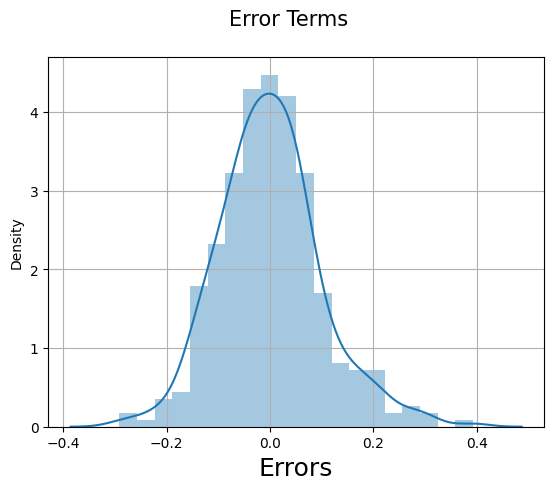

In [ ]:
fig=plt.figure()
plt.grid()
sns.distplot((y_train-y_train_price),bins=20)
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('Errors',fontsize=18)
plt.show()

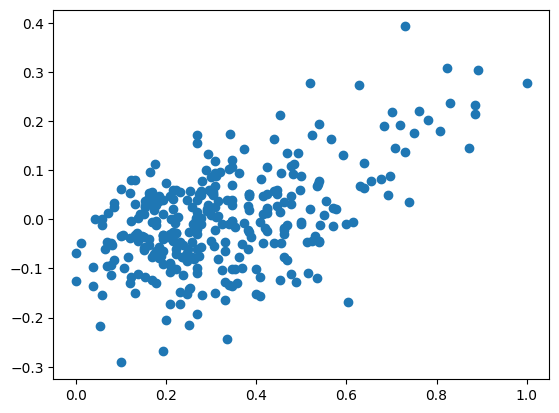

In [ ]:
plt.scatter(y_train, X_1)
plt.show()

# Final Model

In [ ]:
num_1 = ['area','bedrooms','bathrooms','stories','parking',
         'price']
df_test[num_1] = scaler.transform(df_test[num_1])

In [ ]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.334031,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.218405,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.007692,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180769,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.286923,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.440385,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.153846,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Dividing into x_test and y_test
y_test = df_test.pop('price')
x_test = df_test

In [ ]:
#Adding constant variable to test dataframe
x_test_m1 = sm.add_constant(x_test)

In [ ]:
x_test_m1=x_test_m1.drop(["bedrooms","semi-furnished","basement"],axis=1)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score_lr_train = 0.676
print("R-squared train:",r2_score_lr_train)

R-squared train: 0.676


In [ ]:
lr_1.params.sort_values(ascending=False)

area               0.315628
bathrooms          0.231190
stories            0.123498
hotwaterheating    0.097631
airconditioning    0.084751
prefarea           0.066836
mainroad           0.066547
bedrooms           0.061356
parking            0.050825
guestroom          0.046784
basement           0.022815
semi-furnished     0.020240
const              0.014685
unfurnished       -0.016872
dtype: float64